In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
yelp=pd.read_csv('yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [8]:
yelp['text_length'] = yelp['text'].apply(len)

In [9]:
sns.set_style('white')

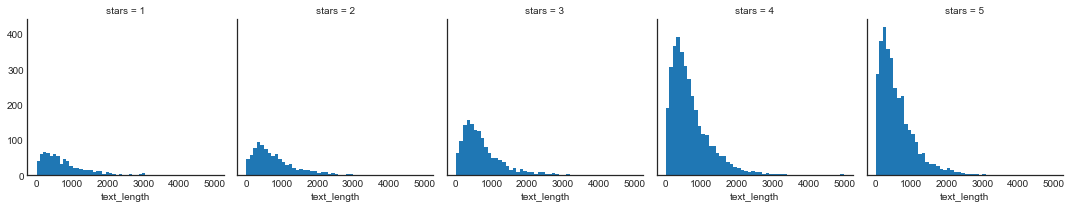

In [11]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length', bins=50)

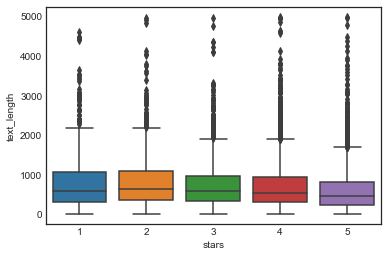

In [13]:
sns.boxplot(x='stars',y='text_length',data=yelp)

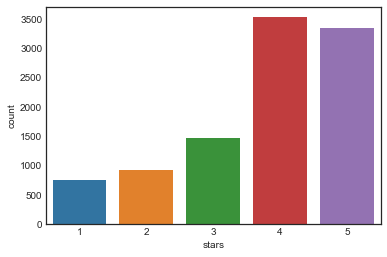

In [14]:
sns.countplot(x='stars',data=yelp)

In [15]:
stars=yelp.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [16]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


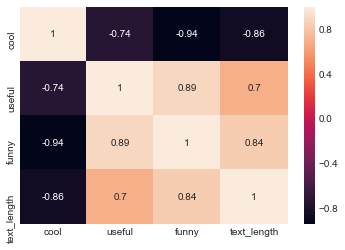

In [18]:
sns.heatmap(stars.corr(),annot=True)

In [19]:
#we'll review only for have stars 1 and 5
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text_length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [20]:
x=yelp_class['text']
y=yelp_class['stars']
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [21]:
x=cv.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
pred = nb.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
from sklearn import metrics
print('\n')
metrics.accuracy_score(y_test,pred)

[[156  77]
 [ 37 956]]


             precision    recall  f1-score   support

          1       0.81      0.67      0.73       233
          5       0.93      0.96      0.94       993

avg / total       0.90      0.91      0.90      1226





0.9070146818923328

In [29]:
#now let's see by including tf-idf using pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())])

In [30]:
x=yelp_class['text']
y=yelp_class['stars']

from sklearn.feature_extraction.text import TfidfVectorizer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=101)
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [31]:
pred=pipeline.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\codehax41\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8140293637846656